In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import  matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score



df=pd.read_csv("/content/travel insurance.csv")
df.head()



,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [8]:
df.fillna('M')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,M,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,M,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,M,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [9]:
df.isnull().sum()

,0
Agency,0
Agency Type,0
Distribution Channel,0
Product Name,0
Claim,0
Duration,0
Destination,0
Net Sales,0
Commision (in value),0
Gender,45107


In [10]:
df.isna().sum()

,0
Agency,0
Agency Type,0
Distribution Channel,0
Product Name,0
Claim,0
Duration,0
Destination,0
Net Sales,0
Commision (in value),0
Gender,45107


In [11]:
le_type_of_travel=LabelEncoder()
le_Proname=LabelEncoder()
le_destination=LabelEncoder()
le_age=LabelEncoder()
le_claim=LabelEncoder()


df['Agency Type']=le_type_of_travel.fit_transform(df['Agency Type'])
df['Destination']=le_destination.fit_transform(df['Destination'])
df['Product Name']=le_Proname.fit_transform(df['Product Name'])
df['Age']=le_age.fit_transform(df['Age'])
df['Claim']=le_claim.fit_transform(df['Claim'])






In [12]:
X=df[['Agency Type','Destination','Product Name','Age']]
y=df['Claim']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [14]:
le_type_of_travel=LabelEncoder()
le_type_of_travel.fit(['Travel Agency	','Airlines'])
le_Proname=LabelEncoder()
le_Proname.fit(['Cancellation Plan	','1 way Comprehensive Plan	','Value Plan	','Ticket Protector','Bronze Plan','Silver Plan','Annual Gold Plan','24 Protect'])
le_destination=LabelEncoder()
le_destination.fit(['MALAYSIA','AUSTRALIA','UNITED STATES	','THAILAND','INDIA','PHILIPPINES','CHINA'])
le_age=LabelEncoder()

le_claim=LabelEncoder()
le_claim.fit(['Yes','No'])





travel_type = input('Enter the travel type (Travel Agency/Airlines): ').strip()
destination = input('Enter the destination: ').strip()
product_name = input('Enter the product name: ').strip()
age = int(input('Enter the age: '))


if (
    travel_type not in le_type_of_travel.classes_ or
    destination not in le_destination.classes_ or
    product_name not in le_Proname.classes_
):
    print('\nInvalid input. Please check your entries.')
else:

    travel_type_encoded = le_type_of_travel.transform([travel_type])[0]
    destination_encoded = le_destination.transform([destination])[0]
    product_name_encoded = le_Proname.transform([product_name])[0]


    input_data = pd.DataFrame([[travel_type_encoded, destination_encoded, product_name_encoded, age]],
                              columns=['Agency Type', 'Destination', 'Product Name', 'Age'])

    prediction_encoded = model.predict(input_data)[0]
   prediction = le_claim.inverse_transform([prediction_encoded])[0]


    print("\nPredicted insurance Claim Status:", prediction)

Enter the travel type (Travel Agency/Airlines): Airlines
Enter the destination: AUSTRALIA
Enter the product name: Silver Plan
Enter the age: 67

✅ Predicted insurance Claim Status: No


In [15]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 98.44%


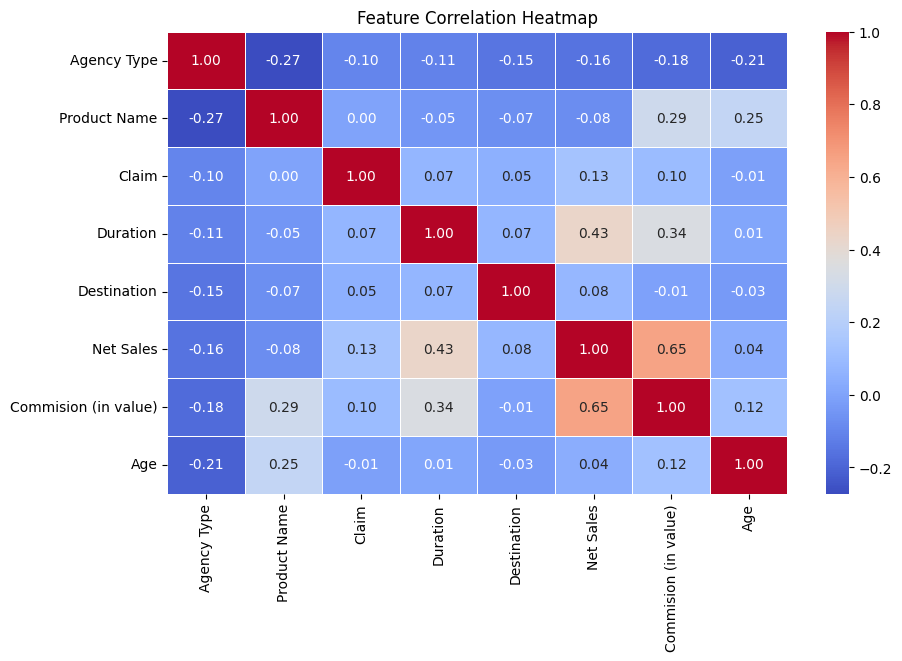

In [18]:
import seaborn as sns
corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
